In [1]:
from parser_commit import get_ids, info_commit
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

In [88]:
# project = 'openstack'
project = 'qt'
path_data = './output/' + project
ids = get_ids([f for f in listdir(path_data) if isfile(join(path_data, f))])
messages, codes = info_commit(ids=ids, path_file=path_data)
print(len(ids), len(messages), len(codes))

29239 29239 29239


In [93]:
from statistics import mean, stdev
def statistic_msg(data, check_type):
    if check_type == 'Title':
        data = [d['title'] for d in data]
    elif check_type == 'Description':
        data = [d['desc'] for d in data]
    elif check_type == 'Title+Description':
        data = [d['title'] + ' ' + d['desc'] for d in data]
    
    data = [len(d.split()) for d in data]
    if check_type == 'Title':
        plt.hist(data, bins=range(0, 25))
    elif check_type == 'Description' or check_type == 'Title+Description':
        plt.hist(data, bins=range(0, 150))
    plt.title(check_type)
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    return mean(data), stdev(data)

6.521597865864086 2.4097224161392106


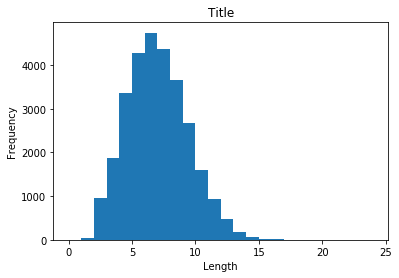

In [90]:
mean_, std_ = statistic_msg(data=messages, check_type='Title')
print(mean_, std_)

(33.272307534457404, 33.89099524007475)

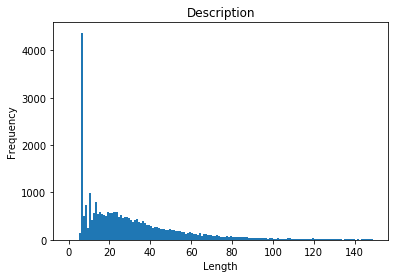

In [94]:
statistic_msg(data=messages, check_type='Description')

(39.793905400321485, 34.25299302378853)

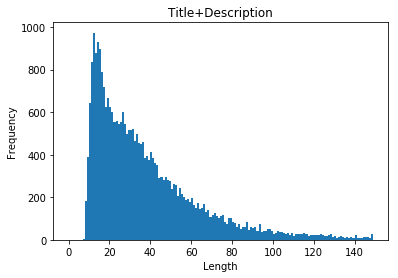

In [95]:
statistic_msg(data=messages, check_type='Title+Description')

In [96]:
def statistical_code(data, check):
    if check == 'File':
        data = [len(d) for d in data]
        plt.hist(data, bins=range(0, 40))
        plt.title(check)
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        return mean(data), stdev(data)
    elif check == 'Code_Added':
        new_data = list()
        for d in data:
            for f in d:
                for l in f['diff']:
                    if l.startswith('+'):
                        if (len(l.split()) - 1) > 0:
                            new_data.append(len(l.split()) - 1)
        plt.hist(new_data, bins=range(0, 25))
        plt.title(check)
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        return mean(new_data), stdev(new_data)
    elif check == 'Code_Removed':
        new_data = list()
        for d in data:
            for f in d:
                for l in f['diff']:
                    if l.startswith('-'):
                        if (len(l.split()) - 1) > 0:
                            new_data.append(len(l.split()) - 1)
        plt.hist(new_data, bins=range(0, 25))
        plt.title(check)
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        return mean(new_data), stdev(new_data)
        
    

(9.838537569684325, 133.61847836654704)

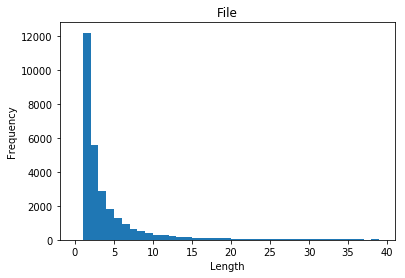

In [97]:
statistical_code(data=codes, check='File')

(4.614300661928509, 4.947725643655646)

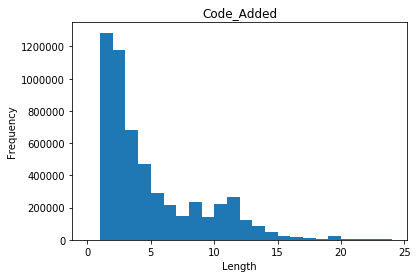

In [100]:
statistical_code(data=codes, check='Code_Added')

(4.659788478541956, 7.364800222447066)

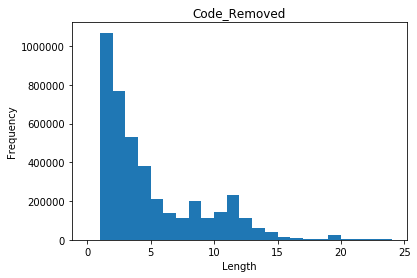

In [101]:
statistical_code(data=codes, check='Code_Removed')

In [39]:
print(codes[0])
print(ids[0])

[{'file': 'diff --git a/test/functionalnosetests/swift_testing.py b/test/functionalnosetests/swift_testing.py', 'diff': ['+from httplib import HTTPException', '-from swiftclient import get_auth, http_connection, HTTPException', '+from swiftclient import get_auth, http_connection']}]
180cd18da64b59c39ec1696e4316b18711d1fb82
